# __site-Oxford-PM Diffusion Tensor Imaging (DTI) analysis notebook__
#### __Last updated on:__ 16/04/2021
#### __Author:__ Rakshit Dadarwal

### __Requirements:__
#### 1. Pre-processing script produced output data

### __This script includes:__
#### 1. DTI parametric maps estimation
#### 2. Compute color-coded or RGB Fractional Anisotropy (FA) map 

### __Import python libraries__ 

In [6]:
import os
import numpy as np
import nibabel as nib
import timeit; timeit.timeit()
# dipy diffusion reconstruction
from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.reconst.dti import TensorModel
from dipy.reconst.dti import fractional_anisotropy
from dipy.reconst.dti import color_fa
# matplotlib plotting
import matplotlib.pyplot as plt
%matplotlib inline

### __Define DWI data path__

In [12]:
#--------------------------------------------------
# Pre-processed DWI data and brain mask
#--------------------------------------------------
sub_id = '032318'
data_path = '/home/rdadarwal/home@dpz/PRIME_DE/site-oxford-PM/sub-'+sub_id+'/ses-001/dwi/'
dwi_file = 'dwi_eddycorrected.nii.gz' # dwi eddy-corrected data
bvals_file = 'sub-'+sub_id+'_ses-001_run-1_dwi.bval' # bval file name
bvecs_file = 'sub-'+sub_id+'_ses-001_run-1_dwi.bvec' # bvec file name

### __Post-processing__

In [13]:
# Change directory
os.chdir(data_path)

#--------------------------------------------------
# load DWI data files
#--------------------------------------------------
img1 = nib.load(os.path.join(data_path,dwi_file))
data = img1.get_data()

bvals, bvecs = read_bvals_bvecs(bvals_file,bvecs_file)
gtab = gradient_table(bvals, bvecs)

#--------------------------------------------------------------
#               Fit diffusion tensor model
#--------------------------------------------------------------
print('Fitting diffuison tensor model')

ten_model = TensorModel(gtab)
ten_fit = ten_model.fit(data)
        
#--------------------------------------------------------------
#               Save DTI parametric maps
#--------------------------------------------------------------
if not os.path.exists(data_path+'/DTI/'):
    os.mkdir(data_path+'/DTI')
output_path = data_path+'/DTI/'
        
FA = ten_fit.fa
AD = ten_fit.ad
RD = ten_fit.rd
MD = ten_fit.md
        
nib.save(nib.Nifti1Image(FA, img1.affine), os.path.join(output_path,'FA.nii.gz'))
nib.save(nib.Nifti1Image(MD, img1.affine), os.path.join(output_path,'MD.nii.gz'))
nib.save(nib.Nifti1Image(RD, img1.affine), os.path.join(output_path,'RD.nii.gz'))
nib.save(nib.Nifti1Image(AD, img1.affine), os.path.join(output_path,'AD.nii.gz'))
    
#--------------------------------------------------------------
#               Save FA RGB map
#--------------------------------------------------------------
fa = fractional_anisotropy(ten_fit.evals)
cfa = color_fa(fa, ten_fit.evecs)
FA = np.clip(fa, 0, 1)
RGB = color_fa(fa, ten_fit.evecs)

nib.save(nib.Nifti1Image(np.array(255 * cfa, 'uint8'), img1.affine), os.path.join(output_path,'FA_RGB.nii.gz'))

print('Elapsed time:',timeit.timeit())
print('Enjoy!!')

Fitting diffuison tensor model
Elapsed time: 0.00830155611038208
Enjoy!!


### __Plot output maps__

Text(0.5, 1.0, 'Axial diffusivity')

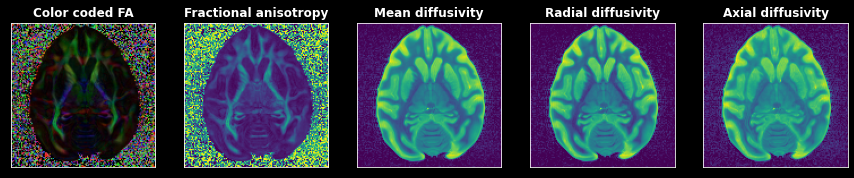

In [19]:
## plot DTI output maps 
# set plot background
plt.style.use('dark_background')
# data shape
a,b,c = FA.shape
# plot paramter maps          
fig, ax = plt.subplots(1,5,figsize=(15,8),subplot_kw={'xticks': [], 'yticks': []})
ax[0].imshow(np.rot90(RGB[:,:,int(c/2),:],k=1,axes=(0,1))) 
ax[0].set_title('Color coded FA',fontweight='bold',size=12)
ax[1].imshow(np.rot90(FA[:,:,int(c/2)],k=1,axes=(0,1))) 
ax[1].set_title('Fractional anisotropy',fontweight='bold',size=12)
ax[2].imshow(np.rot90(MD[:,:,int(c/2)],k=1,axes=(0,1))) 
ax[2].set_title('Mean diffusivity',fontweight='bold',size=12)
ax[3].imshow(np.rot90(RD[:,:,int(c/2)],k=1,axes=(0,1))) 
ax[3].set_title('Radial diffusivity',fontweight='bold',size=12)
ax[4].imshow(np.rot90(AD[:,:,int(c/2)],k=1,axes=(0,1))) 
ax[4].set_title('Axial diffusivity',fontweight='bold',size=12)